In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [19]:
df = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\Kaggle\Cirrhosis\train.csv")
X = pd.get_dummies(df.drop(["Status","id"],axis=1),drop_first=True)
le = LabelEncoder()
y = le.fit_transform(df["Status"])

In [29]:
y

array([2, 0, 2, ..., 2, 2, 0])

In [20]:
test = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\Kaggle\Cirrhosis\test.csv")
X_test = pd.get_dummies(test.drop("id",axis=1),drop_first=True)

In [21]:
### bagging Logistic Regression

In [22]:
lr = LogisticRegression()
bagg_lr = BaggingClassifier(lr,n_estimators =25,random_state=24)

bagg_lr.fit(X,y)

C:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

BaggingClassifier(estimator=LogisticRegression(), n_estimators=25,
                  random_state=24)

In [23]:
y_pred_prob = bagg_lr.predict_proba(X_test)
y_pred_prob

array([[0.92903051, 0.01027169, 0.0606978 ],
       [0.56725323, 0.05473515, 0.37801162],
       [0.4584103 , 0.10525554, 0.43633417],
       ...,
       [0.95024311, 0.01079017, 0.03896672],
       [0.70463457, 0.09002655, 0.20533888],
       [0.71607521, 0.01565844, 0.26826635]])

In [ ]:
submit = pd.DataFrame({"id":test["id"],"Status_C":y_pred_prob[:,0],"Status_CL":y_pred_prob[:,1],"Status_D":y_pred_prob[:,2]})
submit.to_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\Kaggle\Cirrhosis\bagg_logistic_cirrhosis.csv",index=False)

In [24]:
### Grid search for decision tree bagging

In [25]:
dtc = DecisionTreeClassifier(random_state=24)
bagg_dtc = BaggingClassifier(dtc,n_estimators =25,random_state=24)

bagg_dtc.fit(X,y)
bagg_dtc.get_params()

{'bootstrap': True,
 'bootstrap_features': False,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__random_state': 24,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(random_state=24),
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 25,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 24,
 'verbose': 0,
 'warm_start': False}

In [26]:
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=24)
params = {"estimator__min_samples_split":np.arange(2,35,5),"estimator__min_samples_leaf":np.arange(1,35,5), 'estimator__max_depth': [None,2,3,4]}
gcv = GridSearchCV(bagg_dtc,param_grid=params,cv=kfold,scoring='neg_log_loss',n_jobs=8)
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)
y_pred= gcv.predict(X_test)

{'estimator__max_depth': None, 'estimator__min_samples_leaf': 26, 'estimator__min_samples_split': 2}
-0.4926342023965297


In [32]:
y_pred_prob = gcv.predict_proba(X_test)
submit = pd.DataFrame({"id":test["id"],"Status_C":y_pred_prob[:,0],"Status_CL":y_pred_prob[:,1],"Status_D":y_pred_prob[:,2]})
submit.to_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\Kaggle\Cirrhosis\bagg_Decision_cirrhosis.csv",index=False)

In [33]:
##### Rndom Search gridsearch

In [34]:
rf = RandomForestClassifier(random_state=24,n_estimators=25)
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=24)
params = {"min_samples_split":np.arange(2,35,5),"min_samples_leaf":np.arange(1,35,5), 'max_depth': [None,2,3,4], 'max_features': [3,4,5,6,7]}
gcv = GridSearchCV(rf,param_grid=params,cv=kfold,scoring='neg_log_loss',n_jobs=8)
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)
y_pred= gcv.predict(X_test)

{'max_depth': None, 'max_features': 4, 'min_samples_leaf': 16, 'min_samples_split': 2}
-0.4781561489354026


In [35]:
y_pred_prob = gcv.predict_proba(X_test)
submit = pd.DataFrame({"id":test["id"],"Status_C":y_pred_prob[:,0],"Status_CL":y_pred_prob[:,1],"Status_D":y_pred_prob[:,2]})
submit.to_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\Kaggle\Cirrhosis\rf_Decision_cirrhosis.csv",index=False)

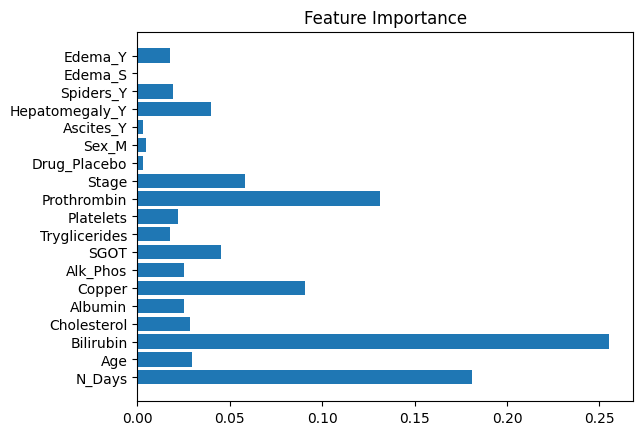

In [36]:
best_tree = gcv.best_estimator_
df_imp = pd.DataFrame({"Feature":list(X.columns),"Importance":best_tree.feature_importances_})
plt.barh(df_imp["Feature"],df_imp["Importance"])
plt.title("Feature Importance")
plt.show()